In [2]:
import os
import yerbamate
env = yerbamate.Environment()

from twitter.data.loader.spark import get_tweets_session

spark = get_tweets_session("userId", "likeCount", "retweetCount")


# distribution of users tweet count(userId)

users_distribution = spark.groupBy("userId").count()



23/06/25 18:30:45 WARN SharedInMemoryCache: Evicting cached table partition metadata from memory due to size constraints (spark.sql.hive.filesourcePartitionFileCacheSize = 2122317824 bytes). This may impact query planning performance.


In [14]:

# plot user tweet count distribution
users_tweet_distribution = users_distribution.toPandas()

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))
# ax.hist(users_tweet_distribution["count"], bins=100)
# ax.set_xlabel("Number of tweets")
# ax.set_ylabel("Number of users")

# ax.set_title("Distribution of users tweet count")

# plt.show()
backup_df = users_tweet_distribution.copy()

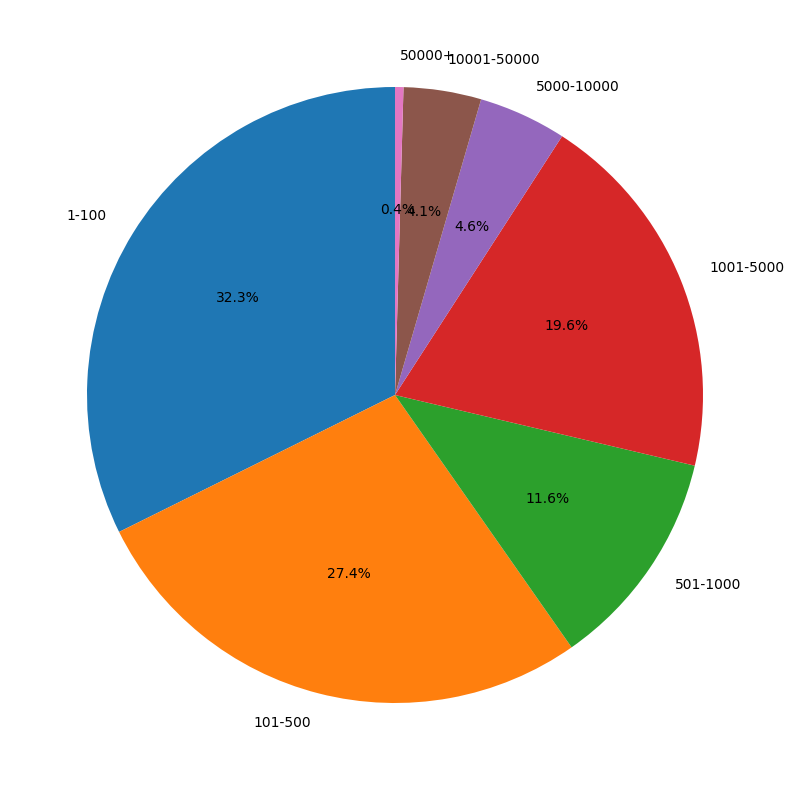

In [15]:
# pie chart of users tweet count distribution
# users_tweet_distribution
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
# create pie chart
fig, ax = plt.subplots(figsize=(10, 10))

bins = [0, 100, 500, 1000, 5000, 10000, 50000, np.inf]
# names = ['1-10', '11-20', '21-30', '31-40', '41-50', '50-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-5000', '5000+']
names = ['1-100', '101-500', '501-1000', '1001-5000', '5000-10000', '10001-50000', '+50000']

users_tweet_distribution['bins'] = pd.cut(backup_df['count'], bins, labels=names)

users_tweet_distribution = users_tweet_distribution.groupby('bins').count()

ax.pie(users_tweet_distribution['count'], labels=users_tweet_distribution.index, autopct='%1.1f%%', startangle=90)

save_path = os.path.join(env["plots"], "analysis", "user_tweet_distribution.png")
plt.savefig(save_path)

In [ ]:
# plot likes count distribution for users / number tweets (index likes count)
users_likes_distribution = spark.groupBy("userId").sum("likesCount")
from pyspark.sql.functions import col

# devide by number of tweets
users_likes_distribution = users_likes_distribution.withColumn(
    "likesCount", col("sum(likesCount)") / col("count")
)


In [ ]:

users_likes_distribution = users_likes_distribution.toPandas()

fig, ax = plt.subplots(figsize=(10, 10))

ax.hist(users_likes_distribution["likesCount"], bins=100)
ax.set_xlabel("Index likes (aggregate of likes / number of tweets)")
ax.set_ylabel("Number of users")